# Fashion Images Classification

**Project Purpose:**

The purpose of the project classify which fashion item is in the image.

**Dataset:**

We have 5000 images for training and 200 images for testing.

There are 9 types of images related to fashion (T-Shirt/Top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag and Ankle Boot).

## Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib

## Importing and exploring dataset

In [18]:
X_train = np.load('Fashion_MNIST/X_train.npy')
y_train = np.load('Fashion_MNIST/y_train.npy')
X_test = np.load('Fashion_MNIST/X_test.npy')
y_test = np.load('Fashion_MNIST/y_test.npy')

In [19]:
label2cat = {0: 'T-shirt/top',
             1: 'Trouser',
             2: 'Pullover',
             3: 'Dress',
             4: 'Coat',
             5: 'Sandal',
             6: 'Shirt',
             7: 'Sneaker',
             8: 'Bag',
             9: 'Ankle boot'}

'Pullover'

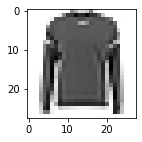

In [20]:
plt.figure(figsize=(2, 2))
i = np.random.randint(5000)
plt.imshow(X_train[i].reshape(28, 28), cmap='Greys')
label2cat[y_train[i]]

## Saving the pipeline

Making pipeline StandardScaler, using PCA (Principle Component Analysis) for dimentionality reduction and training the data with Logistic Regression Model.

In [35]:
steps = [('scaler', StandardScaler()),
         ('pca', PCA()),
         ('clf', LogisticRegression())]
pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

print("TRAIN:")
print(classification_report(y_train, train_predictions))

print("TEST:")
print(classification_report(y_test, test_predictions))

C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


TRAIN:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       457
           1       1.00      1.00      1.00       556
           2       0.96      0.94      0.95       504
           3       0.99      1.00      0.99       501
           4       0.96      0.97      0.96       488
           5       1.00      1.00      1.00       493
           6       0.97      0.95      0.96       493
           7       1.00      1.00      1.00       512
           8       1.00      1.00      1.00       490
           9       1.00      1.00      1.00       506

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000

TEST:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       1.00      1.00      1.00        27
           2       0.78      0.78      0.78        27
           

In [22]:
#saving the pipeline
joblib.dump(pipe_lr, "Fashion_class.pkl")

['Fashion_class.pkl']

## GridSearch

Performing GridSearch on Logistic Regression's hyper-parameters to chose the best performing ones.

In [32]:
steps = [('scaler', StandardScaler()),
         ('pca', PCA()),
         ('clf', LogisticRegression())]
pipe_lr = Pipeline(steps)

params = {"pca__n_components":[0.93, 0.95, 0.97, 0.98],
          "clf__penalty":['l1', 'l2'],
          "clf__C":[0.85, 0.87, 0.9]}

gs_pipe_lr = GridSearchCV(pipe_lr, params, scoring='f1_macro', cv = 2, verbose=1)
gs_pipe_lr.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver 

C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning

C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning

C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\tamar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.85, 0.87, 0.9],
                         'clf__penalty': ['l1', 'l2'],
                         'pca__n_components': [0.93, 0.95, 0.97, 0.98]},
             scoring='f1_macro', verbose=1)

In [33]:
train_predictions = gs_pipe_lr.predict(X_train)
test_predictions = gs_pipe_lr.predict(X_test)

print("TRAIN:")
print(classification_report(y_train, train_predictions))

print("TEST:")
print(classification_report(y_test, test_predictions))

TRAIN:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       457
           1       0.99      0.99      0.99       556
           2       0.82      0.80      0.81       504
           3       0.91      0.93      0.92       501
           4       0.80      0.84      0.82       488
           5       0.98      0.99      0.98       493
           6       0.73      0.68      0.70       493
           7       0.98      0.98      0.98       512
           8       0.99      0.99      0.99       490
           9       0.99      0.99      0.99       506

    accuracy                           0.91      5000
   macro avg       0.90      0.91      0.90      5000
weighted avg       0.91      0.91      0.91      5000

TEST:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.96      1.00      0.98        27
           2       0.85      0.81      0.83        27
           

In [34]:
gs_pipe_lr.best_params_

{'clf__C': 0.85, 'clf__penalty': 'l2', 'pca__n_components': 0.93}

We get the following final resutls on test data:

**Acuracy:** Accuracy on the testing data is 86% which means 86% of the data is correctly predicted.

**Precision:** Precision on the testing data is 87% which means that the amount of false positives is low.

**Recall:** Recal on the testing data is 86% which means that the model accurately predicts 86% percent of true positives.

**F1 Score:** F1 Score on the testing data is 86% which means overall accuracy of the model is 86%. The minimum f1 score on is 63% and the maximum f1-score is 98% (we have 98% accuracy on classifying Trousers).

As the training and testing data metrics do not differ a lot, we can say that we don't have a risk of overfitting.